# Intro to Time Series Analysis in Python

## Author: Annamalai Senthilnathan (annamals)

Hello fellowmates, 
In this tutorial I am going to give you guys an introduction to Time Series Analysis in Python. This tutorial will act as a primer before you approach to predict in any problem that has time series in it. The agenda of the tutorial will be as follows,

1. Why is Time Series different from linear regression?
2. Pandas for Time Series
3. Check Stationarity and making a Time Series stationary
4. Modeling a Time Series data

I hope you guys would enjoy this. Let's start!


## 1. Why is Time Series (TS) different from Linear Regression (LR)?

Given the name, you guys must have a hunch that somehow time influences this data. Yes, this data is basically collected in constant interval of time. These data points that are collected in the past will be used to predict, or in more correct jargon, to forecast the future of the same series. Well, one can argue that isnt that very similar to LR as there also you have a bunch of datapoints and you predict the future of the same vector (with some independent variables added to it). 
    
    The answer is NO. TS data is strongly influenced by time component (which need not be true in a LR problem) and one of the important assumptions of LR (i.e observations are independent of each other) doesn't hold true in TS data because of this time dependence. Also, TS data has seasonality component for a time frame, i.e, #patients that visit hospitals will be more during winter seasons than in any other season of a year.
    
    This is why we should treat TS problem differently than an LR problem. 

Now that we clearly understand what makes TS different from LR, we will look into how to employ Pandas to handle/manipulate TS data and also look into different phases of analyzing TS data and forecasting the same.



## 2. Pandas for Time Series:

Well, you guys must be really comfortable with "pandas" after a series of data science assignments from CMU. We will continue to use pandas here as well. I will walk you guys thru on how to easily manipulate TS data with pandas in this section. 

Pandas has dedicated libraries to handle TS data and one particular class that is really useful is the "datatime64[ns]" which makes our life easier in manipulating time objects in the data frame. 


In [6]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

I have a dataset that holds 10 years of #passengers data (at a monthly level) of a flight carrier. Let me import the dataset into pandas dataframe and showcase it to you guys.

In [7]:
data = pd.read_csv('Net_sales_Data.csv')
print(data.head())
print('Data Types:', data.dtypes)

      mnth  net_sales
0  2006-01        536
1  2006-02        541
2  2006-03        569
3  2006-04        554
4  2006-05        563
Data Types: mnth         object
net_sales     int64
dtype: object


We can clearly see that the "mnth" variable should be a "datatime64[ns]" type and not a "object" type. Now lets change that using pandas with the techniques that were taught to us in PDS (this) class. Also, let us set the mnth column as the index of the dataframe for easy access of datapoints.

In [8]:
data["mnth"] = data["mnth"].apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m'))
print(data.head())
print('Data Types:', data.dtypes)
data = data.set_index("mnth")
print()
print("After setting INDEX ")
print()
print(data.head())
print('Data Types:', data.dtypes)

        mnth  net_sales
0 2006-01-01        536
1 2006-02-01        541
2 2006-03-01        569
3 2006-04-01        554
4 2006-05-01        563
Data Types: mnth         datetime64[ns]
net_sales             int64
dtype: object

After setting INDEX 

            net_sales
mnth                 
2006-01-01        536
2006-02-01        541
2006-03-01        569
2006-04-01        554
2006-05-01        563
Data Types: net_sales    int64
dtype: object


Now that we have converted the object type of mnth variable into datetime64[ns] and set our index to the same variable. The beauty of indexing a datatime[ns] variable is that we can subset data on the fly like shown below. This will come in handy in the later stages.

In [9]:
data['2009']

,net_sales
mnth,
2009-01-01,595
2009-02-01,579
2009-03-01,626
2009-04-01,618
2009-05-01,625
2009-06-01,655
2009-07-01,693
2009-08-01,684
2009-09-01,650


Now, we are good to go for the next steps in the Time series analysis process.

## 3. Checking Stationarity and making a TS data Stationary

Now, you may ask what does it mean for a data series to be stationary or having stationarity. The key is that a series is considered to be stationary if its mean and variance remains constant over time. 

Why is this important in a TS data? Because, intuitively if a data behaves a certain way over time, it is expected to be behaving in the same way in the future. Moreover, dealing with non-stationary series is very difficult from statistics perspective (since, if you don't have mean and variance constant over time (stationarity), then prediction of the same series using its statistical properties over time will be difficult).

Now lets see how is our passengers data looking over time.

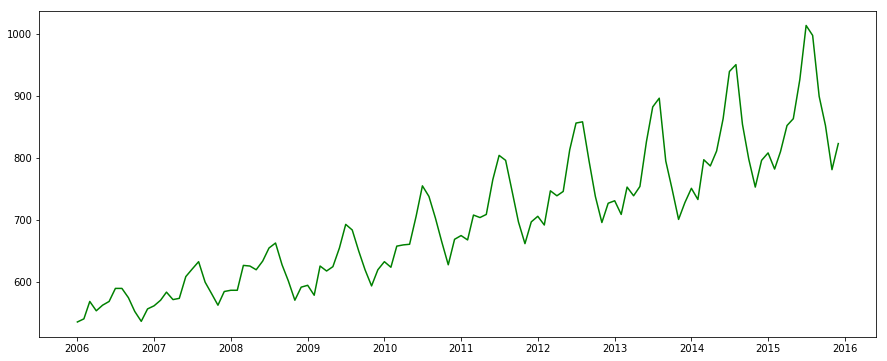

In [10]:
plt.plot(data, color ="green")

We can clearly see that the trend has an overall increase and also has some seasonal variance to it. Now this is just a means to eye-ball and see if the TS series has trend and seasonality components to it. Sometimes, the TS series may not visually give it out to you with plots. So, lets approach this in a more intuitive visualization and also a statistical way. Let me introduce you to Rolling statistics and Dicky-Fuller Test.


### Rolling Statistics & Dicky-Fuller Test

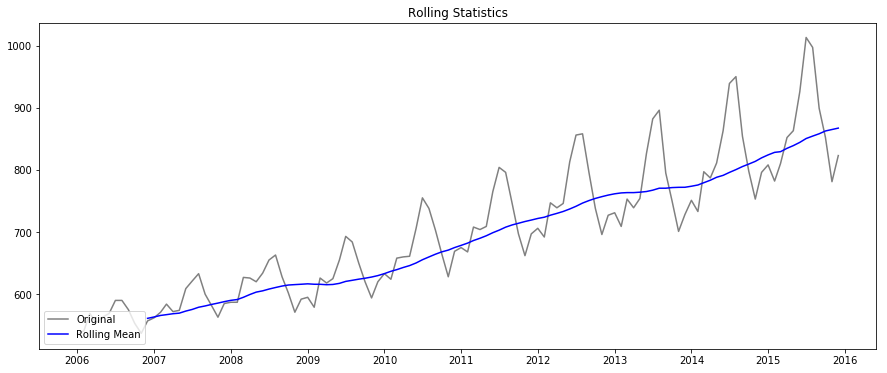

Results of Dickey-Fuller Test:
Test stats                0.648825
p-value                   0.988759
#Lags                    13.000000
#Observations           106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64


In [12]:
# module for rolling stats test
def rollingStats(s):
    #Determing rolling statistics
    s_Series = pd.Series(s)
    rolls = pd.Series.rolling(s_Series, window=12, center= False)
#     print(rolls)
    rolling_mean = rolls.mean()
    rolling_std = rolls.std()

    #Plot rolling statistics:
    original = plt.plot(s_Series, color='grey',label='Original')
    mean_ = plt.plot(rolling_mean, color='blue', label='Rolling Mean')
#     std_ = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='lower left')
    plt.title('Rolling Statistics')
    plt.show(block=False)

# import dicky fuller method
from statsmodels.tsa.stattools import adfuller

def dickyFuller(s):
    print('Results of Dickey-Fuller Test:')
    df_T = adfuller(s)
    df_out = pd.Series(df_T[0:4], index=['Test stats','p-value','#Lags','#Observations'])
    for key,value in df_T[4].items():
        df_out['Critical Value (%s)'%key] = value
    print(df_out)
    

rollingStats(data.net_sales)
dickyFuller(data.net_sales)

From the above visualization we can clearly see that the rolling mean has an increasing trend, thus it is not stationary. From a statistical standpoint, the Test statistics of the dicky-fuller test is way above the Critical values (1%, 5%, 10%) thus giving a more concrete basis that the series needs to be stationarized.

### Making a TS data Stationary

How to make this TS data stationary? But, before that, let us understand what is making this TS non-stationary. <b> Trend and Seasonality. </b> 
How to get rid of these things? Let us first focus on TREND. There are multiple ways to estimate and eliminate trend in a TS data.

##### Transformation

A simple way to eliminate some of the trend in the data can be applying a transformation (for simplicity, log-transformation to penalize higher values).

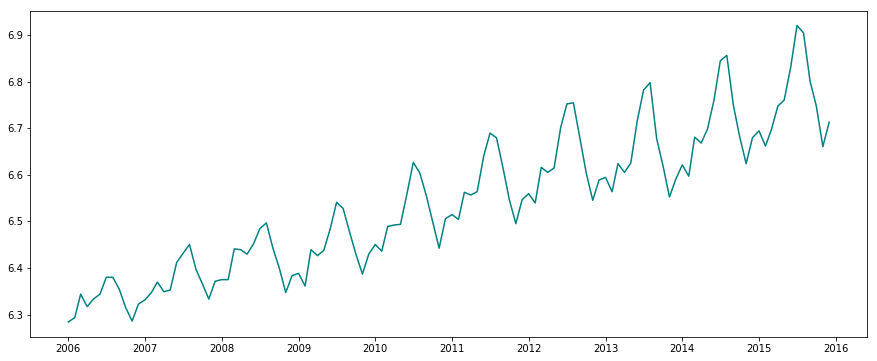

In [13]:
data_log = np.log(data.net_sales)
plt.plot(data_log, color= "teal")

One the time series has been transformed, we can now apply some more techniques  on top of that to model the trend and remove it from the TS data.

##### Differencing the series

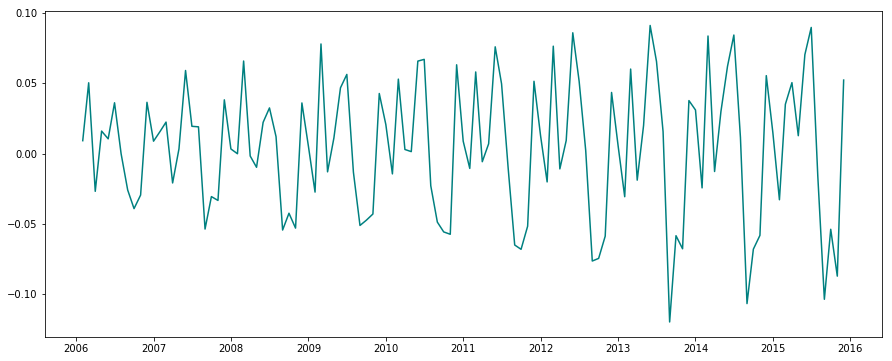

In [14]:
data_log_shift = data_log.shift()
dataL_diff = data_log - data_log_shift
plt.plot(dataL_diff, color="teal")

From the visualization we can see that the trend is massively reduced. Let us use our plotting methos to check for stationarity.

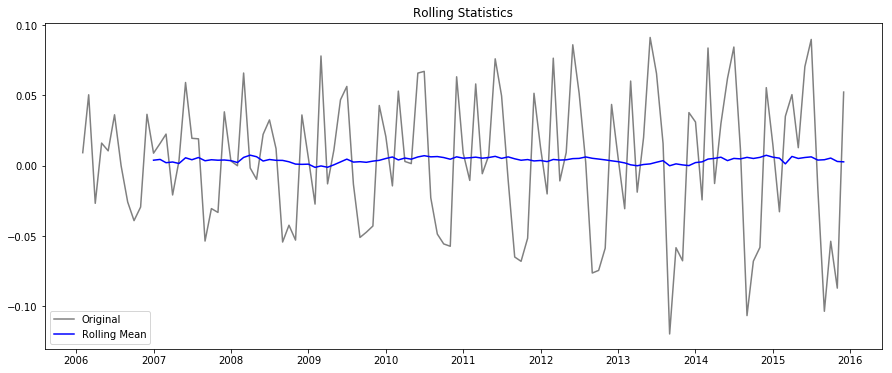

Results of Dickey-Fuller Test:
Test stats               -2.659571
p-value                   0.081299
#Lags                    12.000000
#Observations           106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64


In [15]:
dataL_diff.dropna(inplace=True) # droping the NaN values due to differencing
rollingStats(dataL_diff)
dickyFuller(dataL_diff)

We can see that the Test Statistics is lesser than the Critical values (10%), which is a great progress in making stationarity in the TS data. Let us try to remove SEASONALITY as well.

We have a super cool methodology which will separate trend, seasonality and residuals separately. This method is called DECOMPOSITION. Let us see that visually.

##### Decomposing

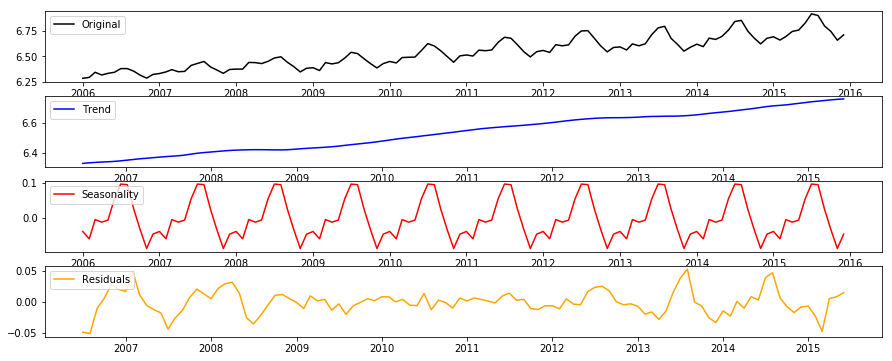

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data_log)
# original
plt.subplot(411)
plt.plot(data_log, label='Original', color = "black")
plt.legend(loc='upper left')
# Trend
plt.subplot(412)
plt.plot(decomp.trend, label='Trend', color = "blue")
plt.legend(loc='upper left')
# Seasonality
plt.subplot(413)
plt.plot(decomp.seasonal,label='Seasonality', color = "red")
plt.legend(loc='upper left')
# Residual
plt.subplot(414)
plt.plot(decomp.resid, label='Residuals', color = "orange")
plt.legend(loc='upper left')
# plt.tight_layout()

Now we have separated trend and seasonality from the TS data. Residual is free from both of those influences. Now let us see if the residula has any non-stationarity in them using our rolling statistics & dicky-fuller methods.

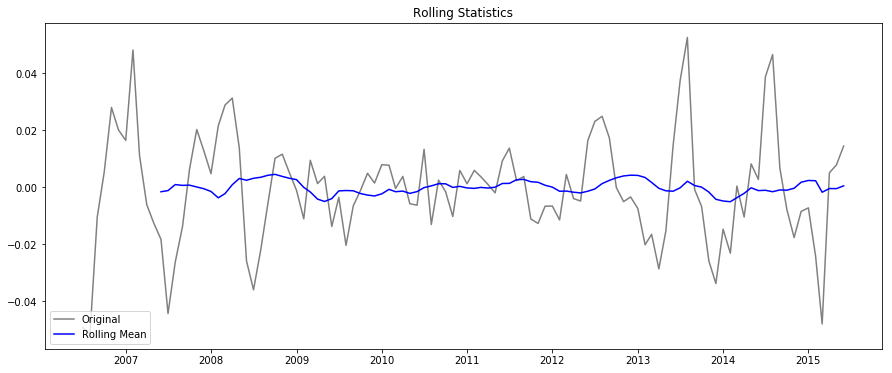

Results of Dickey-Fuller Test:
Test stats              -3.501799
p-value                  0.007941
#Lags                   11.000000
#Observations           96.000000
Critical Value (1%)     -3.500379
Critical Value (5%)     -2.892152
Critical Value (10%)    -2.583100
dtype: float64


In [17]:
dataF_decomp = decomp.resid
dataF_decomp.dropna(inplace=True)
rollingStats(dataF_decomp)
dickyFuller(dataF_decomp)

Finally, our TS data is Stationary. We can see that from the fact that Test statistics is lesser than that of Critical values (1%).

Now that we have the TS stationary, we can go ahead and forecast the same.

## 4. Modeling a TS data

Now that we have eliminated trend and seasonality, we end up in EITHER having a strictly stationary series (no dependencies among values, very easy to model, but, rare in occurrence) OR having dependency ampong values (frequent in occurrence and can be tackled by using some statistical methods)

I will walk you guys thru the second scenario of having dependency among values in the TS data. Usually, the statistical methods that are used to model this data would be moving averages, smoothing averages, autoregression etc., but a more powerful method to model and forecast this TS data is ARIMA model.

##### ARIMA Model

ARIMA model is nothing but a combination of AutoRegression (AR), Differentiation (I), Moving Averages (MA). 
The number of AutoRegression lags on dependent variable is denoted by the variable 'p'.
The number of Moving Average lags on error terms is denoted by the variable 'q'.
The number of differentiation is denoted by the variable 'd'.

If p = 5, then for a given time 't' the prediction of X(t) will be made by values X(t-1),...,X(t-5).
Similarly if q = 5, then the predictors of X(t) will be error(t-1),...,error(t-5) where error(m) is the difference between m-th value and the actual value.
d - denotes the number of non-seasonal differences. If d is 1, you will differentiate the series once.


How to determine Autoregressive lags (p) and Moving average lags (q)?

We have two amazing methods in statistics called Partial-AutoCorrelation Function (PACF) and AutoCorrelation Function (ACF), to determine p and q respectively.

What is PACF and ACF? 

PACF - It is the correlation between TS data and its lagged version but eliminating any other variations due to previous lagged comparisons. if p = 3, it will check correlation but remove the effects of other lags due to p=1 and p=2.

ACF - It is the correlation between TS data and its lagged versions. For lag p = 3, it would compare series at time instance t1, t2 with t1-3, t2-3.

So, how would you find them programmatically? Lets see that!

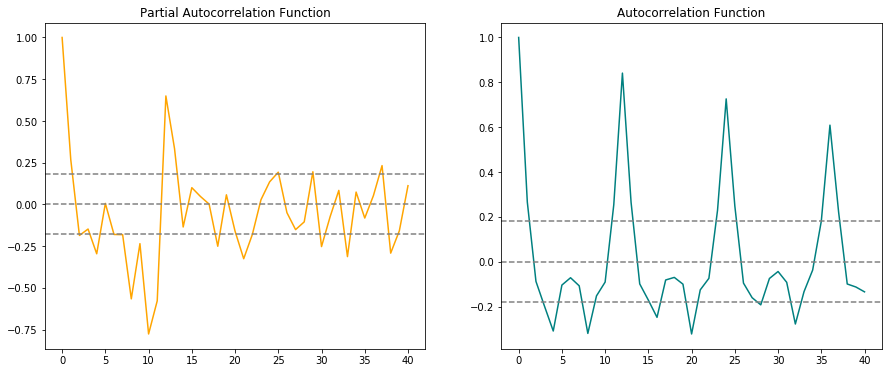

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataL_diff)
lag_pacf = pacf(dataL_diff,method='ols')

#Plot PACF:
plt.subplot(121)
plt.title('Partial Autocorrelation Function')
plt.plot(lag_pacf, color = "orange")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataL_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataL_diff)),linestyle='--',color='gray')

#Plot ACF: 
plt.subplot(122) 
plt.title('Autocorrelation Function')
plt.plot(lag_acf, color = "teal")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataL_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataL_diff)),linestyle='--',color='gray')



From the visualization, the PACF and ACF lags cross the upper confidence boundary close to 1 and 2 respectively. So, lets decide on p=1 and q=2.

Lets start building ARIMA model. The parameters are p=1, q=2 and d=1 (since we used differenced the TS data once above).

##### ARIMA Modeling and Prediction for the next 1 year.

RSS: 0.193930189584


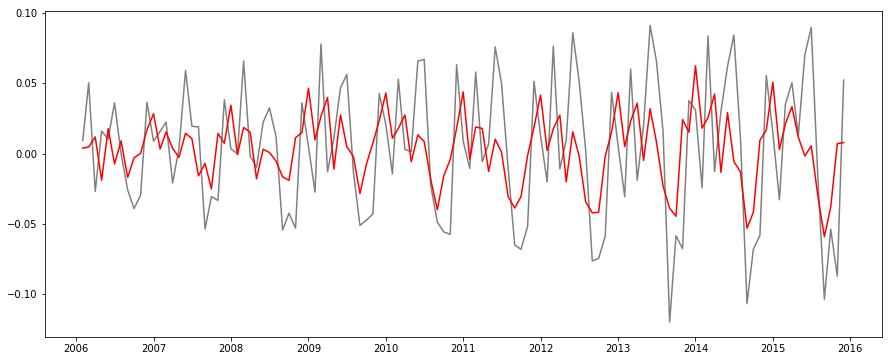

In [19]:
from statsmodels.tsa.arima_model import ARIMA

ARIMA_model = ARIMA(data_log, order=(1, 1, 2))  #p,d,q
results = ARIMA_model.fit()  
plt.plot(dataL_diff, color ="gray")
plt.plot(results.fittedvalues, color='red')

# RSS
print('RSS:', sum((results.fittedvalues-dataL_diff)**2))

We have a really good RSS value of 0.1939. Also, we can see from the visualization that for the estimated p, q, d values, we have a very good fit with the 10 year TS data. Now, let us take this fit back to the same scale and check the RSS in that scale. Before that, I would like to showcase a little nuance in taking it to the same scale.

In [20]:
pred_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
print(pred_ARIMA_diff.head())

mnth
2006-02-01    0.003994
2006-03-01    0.004817
2006-04-01    0.011932
2006-05-01   -0.018779
2006-06-01    0.017958
dtype: float64


If you can see closely, you can notice that the fitted values start from the month '2004-02-01'. This is because our differencing lag was 1 and there was nothing to difference in the past for the first value. 

In order to bring this back to original scale first we have to find the cummulated series of the fitted values (which will be our differences) then add it to the base number which will be the first value of the log transformed TS data. Once the log-transformed values have been added, we will revert the log-transformed values using exponent.

In [21]:
# cummulating all the differences
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
print(pred_ARIMA_diff_cumsum.head())

# adding it to the base number in the log-transformed values
pred_ARIMA_log = pd.Series(data_log['2006-01-01'], index=data_log.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
print(pred_ARIMA_log.head())

# reverting the log-transform
final_pred_ARIMA = np.exp(pred_ARIMA_log)
print(final_pred_ARIMA.head())


mnth
2006-02-01    0.003994
2006-03-01    0.008811
2006-04-01    0.020743
2006-05-01    0.001964
2006-06-01    0.019922
dtype: float64
mnth
2006-01-01    6.284134
2006-02-01    6.288128
2006-03-01    6.292946
2006-04-01    6.304877
2006-05-01    6.286099
dtype: float64
mnth
2006-01-01    536.000000
2006-02-01    538.145108
2006-03-01    540.743822
2006-04-01    547.234422
2006-05-01    537.053992
dtype: float64


Now that we have reverted to the original scale let us plot the predictions against the actual values and see how well we have established a fit.

RMSE 48.4015692114


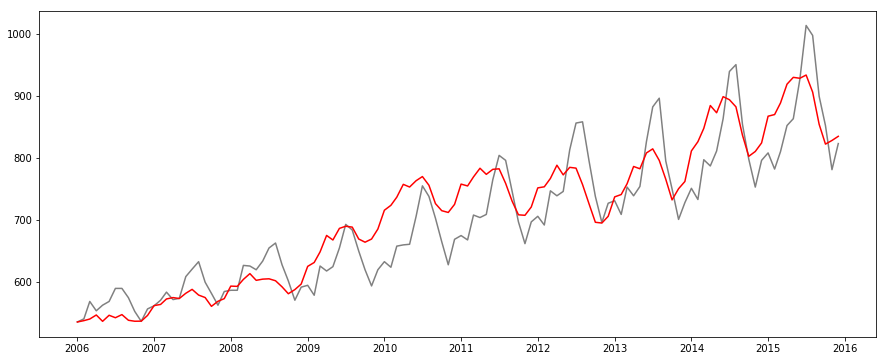

In [22]:
temp = data.net_sales
plt.plot(temp, color = "gray")
plt.plot(final_pred_ARIMA, color = "red")
# RMSE
print('RMSE',np.sqrt(sum((final_pred_ARIMA - temp)**2)/len(temp)))

We have got a RMSE of ~48 (48K in net sales). As you can see, we have established a decent fit using the Time series modeling (ARIMA) to the original data. This is how we can model the TS data. In order to forecast from this model, you can find a method called predict() in these model objects that can predict to desired number of output datapoints. 

As a continuation to this topic, please also read on other advanced topics like how to incorporate seasonal differences in ARIMA model (SARIMA) and also how to include exogeneous variables in ARIMA (ARIMAX) or SARIMA (SARIMAX) models. 

Hope this tutorial helped you guys to learn how to model a TS data. 

Thanks!

### REFERENCES: (CITATIONS)
https://www.youtube.com/watch?v=Y2khrpVo6qI
https://www.youtube.com/watch?v=Aw77aMLj9uM
https://www.youtube.com/watch?v=JMPeo2wSRSg
https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
https://www.youtube.com/watch?v=JMPeo2wSRSg
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
